# Basic Usage

In [1]:
# This path append is just for testing from within the examples folder, no need for the user to add this
import sys
sys.path.append("..")

import CoCoMET


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119

===============Welcome To CoCoMET===============

A toolkit of the Advanced Study of Cloud and Environment iNTerations (ASCENT) program.

This project was supported by the U.S. Department of Energy (DOE) Early Career Research Program, Atmospheric System Research (ASR) program, and the Office of Workforce Development for Teachers and Scientists (WDTS) under the Science Undergraduate Laboratory Internships Program (SULI).

If you are using this software for a publication, please cite: ####




In [8]:
# This cell is uncessary. It just illustrates the CONFIG loading
CONFIG = CoCoMET.CoCoMET_load(path_to_config="./example_configs/boilerplate.yml")

print(CONFIG)

=====WRF Setup Found in CONFIG=====
=====RADAR Setup Found in CONFIG=====
{'verbose': True, 'parallel_processing': False, 'max_cores': 32, 'wrf': {'path_to_data': '/D3/data/hweiner/Nexrad_Wrf_Amazon_Data/Amazon_Data_3_31_2014/04_01/4_hours/wrfout*', 'is_idealized': False, 'feature_tracking_var': 'DBZ', 'segmentation_var': 'DBZ', 'tobac': {'feature_id': {'threshold': [30, 40, 50], 'target': 'maximum', 'position_threshold': 'weighted_diff', 'sigma_threshold': 0.5, 'n_min_threshold': 4, 'height': 2}, 'linking': {'method_linking': 'predict', 'adaptive_stop': 0.2, 'adaptive_step': 0.95, 'order': 1, 'subnetwork_size': 10, 'memory': 0, 'v_max': 20, 'time_cell_min': 120}, 'segmentation_2d': {'height': 2, 'method': 'watershed', 'target': 'maximum', 'threshold': 30}, 'analysis': {'area': {'height': 2}}}}, 'standard_radar': {'path_to_data': '/D3/data/hweiner/Nexrad_Wrf_Amazon_Data/RADAR/standard/*', 'min_frame_index': 0, 'max_frame_index': 44, 'feature_tracking_var': 'DBZ', 'segmentation_var': 'D

In [9]:
# This is the only function required to run CoMET. All details are in the CONFIG
import CoCoMET

output = CoCoMET.CoCoMET_start(CONFIG=CONFIG)

=====Loading WRF Data=====
=====Starting WRF tobac Feature ID=====
=====Starting WRF tobac Feature Linking=====
=====Starting WRF tobac 2D Segmentation=====


=====Performing tobac Segmentation to US=====: 100%|██████████| 24/24 [00:38<00:00,  1.58s/it]


=====Starting WRF tobac Analysis Calculations=====


=====Calculating Areas=====: 100%|██████████| 24/24 [05:54<00:00, 14.77s/it]


=====Converting WRF tobac Output to CoCoMET-US=====
=====WRF tobac Tracking Complete=====
=====Loading STANDARD_RADAR Data=====
=====Starting STANDARD_RADAR tobac Feature ID=====
=====Starting STANDARD_RADAR tobac Feature Linking=====
=====Starting STANDARD_RADAR tobac 2D Segmentation=====


=====Performing tobac Segmentation to US=====: 100%|██████████| 45/45 [00:00<00:00, 375.42it/s]


=====Starting STANDARD_RADAR tobac Analysis Calculations=====


=====Calculating Areas=====: 100%|██████████| 45/45 [00:01<00:00, 39.86it/s] 


=====Converting STANDARD_RADAR tobac Output to CoCoMET-US=====
=====STANDARD_RADAR tobac Tracking Complete=====
=====CoCoMET Performance Diagonistics=====
$ Total Process Time: 1118.42 Seconds
$ Allocated Resources: Cores = 1


In [10]:
print(output['standard_radar']['tobac']['analysis']['area'])
print(output["wrf"]["tobac"]["analysis"]["area"])

     frame  feature_id  cell_id     area
0        0           0        0   2220.0
1        1           1        1   1044.0
2        1           2        0   1764.0
3        2           3        1   3452.0
4        3           4        2   3756.0
..     ...         ...      ...      ...
446     44         446      169   3964.0
447     44         447      188    508.0
448     44         448      185   6316.0
449     44         449      157   9332.0
450     44         450      189  29836.0

[451 rows x 4 columns]
       frame  feature_id  cell_id   area
0          0           0        0   19.0
1          0           1        1    7.0
2          0           2        2   12.0
3          0           3        3   13.0
4          0           4        4   14.0
...      ...         ...      ...    ...
31718     23       31718     6287   42.0
31719     23       31719     5812   67.0
31720     23       31720     7242  326.0
31721     23       31721     2621   77.0
31722     23       31722     5820

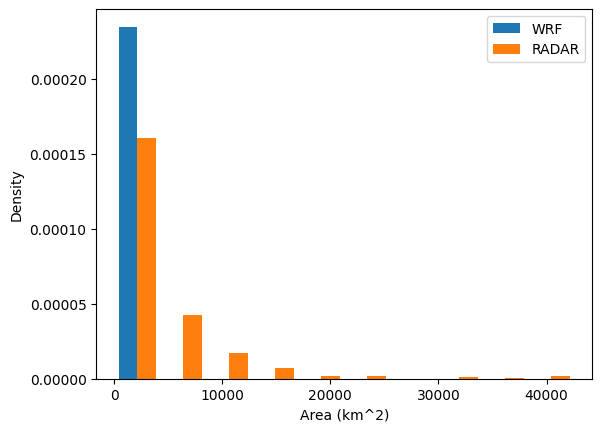

In [11]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()

ax.hist([output['wrf']['tobac']['analysis']['area'].area.values,output['standard_radar']['tobac']['analysis']['area'].area.values],density=True,label=["WRF","RADAR"])
ax.set_xlabel("Area (km^2)")
ax.set_ylabel("Density")
ax.legend()
plt.show()